## Trial-4
### IMDb movies dataset - EDA

We will begin by importing the necessary libraries and loading the dataset.

In [ ]:
# To be able to load the libraires, first we need to have them installed in our environment
# If you haven't installed them yet, you can do so using pip in the cmd:
# pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
# We use a relative path so that it works on any machine as long as it has downloaded all the files
# The dataset is loaded as a pandas DataFrame so that we can easily manipulate it
df = pd.read_csv("../datasets/imdb_top_1000.csv")

Now that we have all the tools we need to explore the data for now, we will start approaching the df by looking into its size, columns and entries. 

In [ ]:
# The three functions used here belong to the pandas library
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nFirst 5 rows:")
display(df.head(5))

Shape of dataset: (1000, 16)

Columns:
 Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

First 5 rows:


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


Continuing with the EDA we perform now our first analysis of the df.

In [ ]:
# First we take a more general look at the df
print("\nInfo:")
df.info()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   Int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    Int64  
dtypes: Int64(2), float64(2), int64(1), object(11)
memory usage: 127.1+ KB


We can see the different data types of each column, which we will need to take into account for further processing.

We can also see that there are some null values in the "Metascore", "Certificate" and "Gross" columns, which is something that we will need to fix for further analysis.

Now, we perform a basic descriptive statistics analysis of the df

In [ ]:
print("\nSummary statistics:")
display(df.describe(include="all"))


Summary statistics:


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,1000,1000,1000,899,1000.0,1000,1000.000000,1000,843.000000,1000,1000,1000,1000,1000,1.000000e+03,831.0
unique,1000,999,100,16,<NA>,202,NaN,1000,NaN,548,660,841,891,939,NaN,<NA>
top,https://m.media-amazon.com/images/M/MV5BMTY5OD...,Drishyam,2014,U,<NA>,Drama,NaN,A man in London tries to help a counter-espion...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,<NA>
freq,1,2,32,234,<NA>,85,NaN,1,NaN,14,12,7,5,4,NaN,<NA>
mean,NaN,NaN,NaN,NaN,122.891,NaN,7.949300,NaN,77.971530,NaN,NaN,NaN,NaN,NaN,2.736929e+05,68034750.873646
std,NaN,NaN,NaN,NaN,28.093671,NaN,0.275491,NaN,12.376099,NaN,NaN,NaN,NaN,NaN,3.273727e+05,109750043.192185
min,NaN,NaN,NaN,NaN,45.0,NaN,7.600000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,1305.0
25%,NaN,NaN,NaN,NaN,103.0,NaN,7.700000,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,5.552625e+04,3253559.0
50%,NaN,NaN,NaN,NaN,119.0,NaN,7.900000,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,1.385485e+05,23530892.0
75%,NaN,NaN,NaN,NaN,137.0,NaN,8.100000,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,3.741612e+05,80750893.5


Let's slow down for a bit here, because we have found some issues.

Before anything, there is no need to be scared about all the NaN values outputted by the descriptive statistics analysis, it makes sense that columns with categorical data don't have a mean.

But the Gross column, apart from having null values (which is an issue we will take care of later), is an object type column, despite containing numbers in a continuous scale. We can fix this simply  by changing it's data type. The same thing happens with the Runtime column.

Python has detected the column Gross as an object type due to the numbers in it being separated by commas, before converting to int64 we need to remove them.

df['Gross'] = df['Gross'].str.replace(',', '').astype(int)

We will see that this method gives us an error, this is because there are some NaN values in the Gross column. NaN values are float type and they can't be converted using the .astype(int) method.

There are many, many, many ways to solve this. The one that I choose is to use the Int64 pandas data type, which supports NaN values. Alternatively, we could convert the entire column to float64, although this method would make us lose precision with very large numbers.

In [ ]:
df['Gross'] = df['Gross'].str.replace(',', '').astype('Int64')
# We do the same for the Runtime column, removing the ' min' string and converting to int64
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype('Int64')

Another thing we could see is that the columns with either float64 (decimal numbers) or int64 (whole numbers) data types don't have a top value or unique values, this is due to the data in those columns having a continuous scale.

When we used the describe function earlier, we specifically asked for it to include "all" statistics (categorical and numerical), that is why the columns have values for only one of those types of statistics. 


Missing values per column:
Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


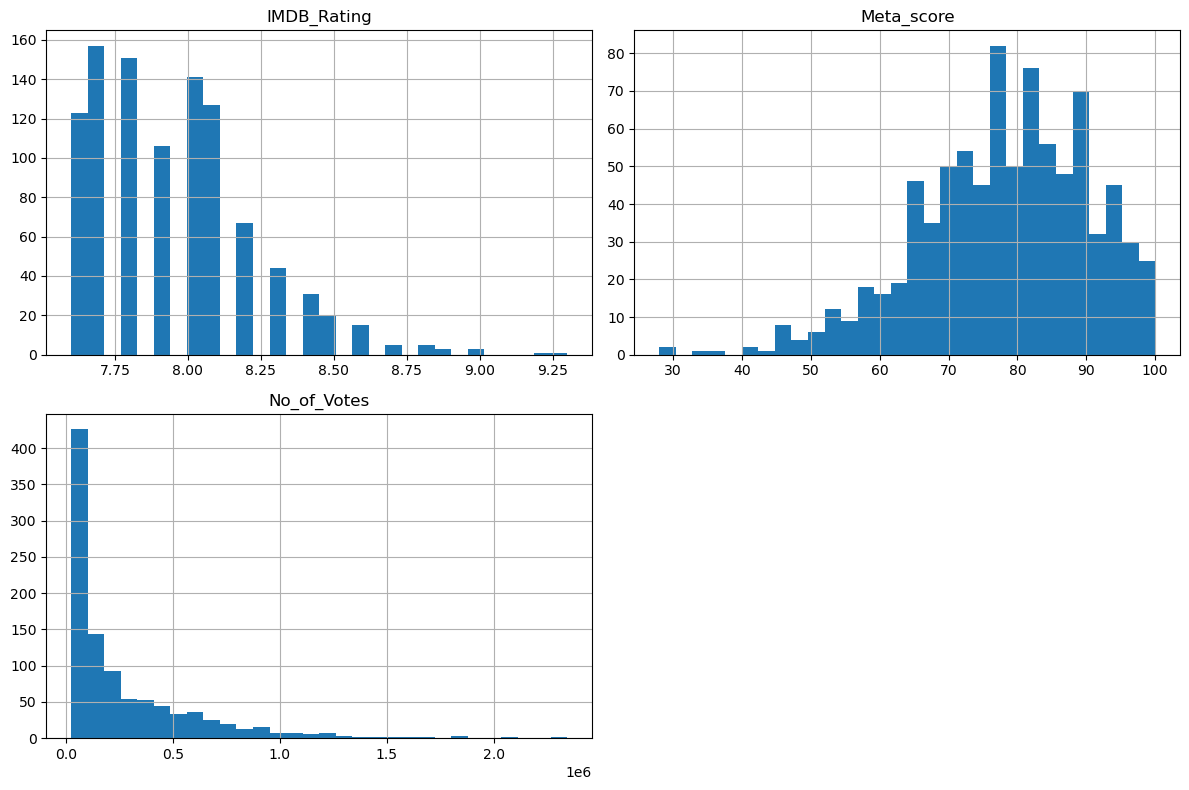

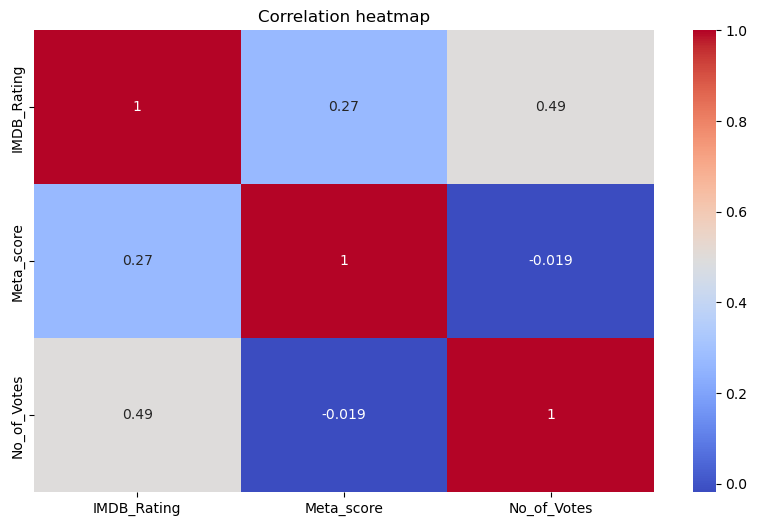

In [ ]:

# Step 5: Missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Step 6: Basic visualizations
# Distribution of numeric columns
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

# Correlation heatmap (only for numeric cols)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()